[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/12_earth_age/heat_equation_for_student.ipynb)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import scipy.sparse as sparse
import time
import IPython.display as IP

In [2]:
# Define the number of grid points
m = 51
# Define grid spacing
dx = 1
# Define the grid
x = np.linspace(dx, m*dx, num=m, endpoint=True)
# Integration time
time_e = 100

# Initial condition
y0 = np.exp(-((x-26.) / 20.)**2) # a broad Gaussion to illustrate fixed BC
# Define diffusivity
D = 1

# Define the Laplacian operator
e1 = np.ones((1, m)) # build a vector of ones
diags = np.concatenate((e1, -2.*e1, e1)) # diagonal entries
offsets = np.array([-1, 0, 1]) # which diagonals
A = sparse.dia_matrix((diags, offsets), shape=(m, m)) # diagonal matrix

# Assume fixed y values at boundaries
b = np.zeros(m)
b[0] = y0[0]
b[-1] = y0[-1]
# Take to be the same as nearby initial values but doesn't have to be so

# If it is the no flux boundary condition, modify A as the follows
# Think about why.
# A[0,0] = -1.
# A[m-1,m-1] = -1.
# b[:] = 0.

In [3]:
# Use ode solvers for this; method of lines
def F(t, y, D, A, b, dx):
    """RHS of the heat equation

    Args:
        t (float): 1-D independent variable (time)
        y (numpy.ndarray): N-D vector-valued function (state)
        D (float): diffusivity
        A (numpy.ndarray): Laplacian operator
        b (numpy.ndarray): source term
        dx (float): grid spacing

    Returns:
        numpy.ndarray: differential equation
        
    """
    return D * (sparse.csr_matrix.dot(A, y) + b) / (dx**2)

sol = solve_ivp(F, [0, time_e], y0, args=(D, A, b, dx), max_step=1.)
t = sol.t
y = sol.y

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

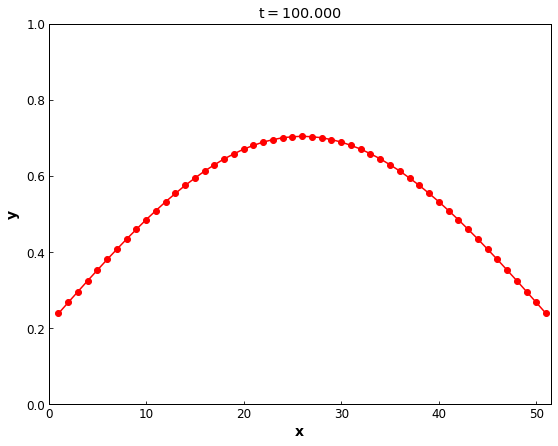

In [5]:
# Alternative way to animate the solution using FuncAnimation
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1) 

for i,time in enumerate(t):
    ax.cla()
    ax.plot(x, y[:,i], 'r-o')
    ax.set_xlim(0, 51.5)
    ax.set_ylim(0, 1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$t = %.3f$' % time)
    
    IP.display(fig)
    IP.clear_output(wait = True)
    plt.pause(0.01)